## Average responses to the airpuff stimuli of all cells/all experiments

Selects all puff data with 1 second or less puffs and plots amplitudes

Plots for:
    - scatters (df/f and df/f of the shifted window)
    - histograms and cumulatives
    - violin plots
    

In [1]:
# To save pdfs and pngs (pngs for git)

from djexpcode.schemas import *
from djexpcode import *
import pandas as pd
import djexpcode
pngsavepath = os.path.abspath(pjoin(os.path.dirname(os.path.dirname(djexpcode.__file__)),'figures/figure1'))
if not os.path.isdir(pngsavepath):
    os.mkdir(pngsavepath)
    print(pngsavepath)

pdfsavepath = os.path.abspath(pjoin(pngsavepath,'pdf'))
if not os.path.isdir(pdfsavepath):
    os.mkdir(pdfsavepath)
    print(pdfsavepath)

import matplotlib
matplotlib.rcParams.update({'axes.labelsize': 8.0,})

# For exporting notebook to bitbucket ise inline
%matplotlib widget

Connecting root@localhost:3306


In [3]:
# Find keys
# Load dataset
sesnames,session_subnames,recording_areas = (StimulusAirPuff()*TwoPhotonVolume()).fetch(
    'session_name','session_subname','recording_area')
keys = []
for s,n,r in zip(sesnames,session_subnames,recording_areas):
#    if 'whisker' in n  or 'closedLoopActuator' in n or 'puffs' in n:
    if 'whisker' in n and 'bandpass' in n:
        en = (TreadmillPositionExperiment() & dict(session_name = s,
                             session_subname = n)).fetch('enucleated')
        if len(en):
            e = en[0]
        else:
            e = 0
        if not e:
            keys.append(dict(session_name = s,
                             session_subname = n,
                             enucleated = e,
                             recording_area = r))
            print(s,n)

    else:
        pass

171102_JC048_2P_JC run01_bandpass_noise_sf_tuning_whiskers
171102_JC048_2P_JC run00_bandpass_noise_sf_tuning_whiskers
180316_JC062_2P_JC run04_bandpass_noise_sf_tuning_whiskers
190204_JC092_2P_RL_JC run01_bandpass_noise_sf_tuning_whiskers
171102_JC048_2P_JC run03_bandpass_noise_sf_tuning_whiskers
171107_JC048_2P_S1_JC run00_bandpass_noise_sf_tuning_whiskers
181008_JC079_2P_JC run01_bandpass_noise_sf_tuning_whiskers
190126_JC092_2P_S1_JC run01_bandpass_noise_sf_tuning_whiskers
190126_JC092_2P_Str_JC run03_bandpass_noise_sf_tuning_whiskers
171102_JC048_2P_JC run02_bandpass_noise_sf_tuning_whiskers
171107_JC048_2P_V1_JC run01_bandpass_noise_sf_tuning_whiskers
180425_JC054_2P_JC run00_bandpass_noise_sf_tuning_whiskers
180425_JC059_2P_JC run00_bandpass_noise_sf_tuning_whiskers
180208_JC060_2P_JC run02_bandpass_noise_circle_retino_whiskers
180515_JC062_2P_JC run02_bandpass_noise_sf_tuning_whiskers
181009_JC079_2P_JC run01_bandpass_noise_sf_tuning_whiskers
190204_JC092_2P_V1_JC run03_bandpass

In [4]:
dfs = []
for key in tqdm(keys,desc='Loading data'):
    dfs.append(pd.DataFrame((StimulusAirPuff()*StimulusAirPuff.Triggered()*TwoPhotonVolume() & key).fetch()))
df = pd.concat(dfs)
print('Concatenated data from multiple experiments.')

Loading data: 100%|██████████| 19/19 [01:13<00:00,  4.15s/it]


Concatenated data from multiple experiments.


## Scatters 
    Uses only one session per experiment 
### Response amplitude (amplitude during the stim - pre) 

In [30]:
expkeys


mouse_id            session_name  \
0    JC048      171102_JC048_2P_JC   
0    JC048      171102_JC048_2P_JC   
0    JC062      180316_JC062_2P_JC   
0    JC092   190204_JC092_2P_RL_JC   
0    JC048      171102_JC048_2P_JC   
0    JC048   171107_JC048_2P_S1_JC   
0    JC079      181008_JC079_2P_JC   
0    JC092   190126_JC092_2P_S1_JC   
0    JC092  190126_JC092_2P_Str_JC   
0    JC048      171102_JC048_2P_JC   
0    JC048   171107_JC048_2P_V1_JC   
0    JC054      180425_JC054_2P_JC   
0    JC059      180425_JC059_2P_JC   
0    JC060      180208_JC060_2P_JC   
0    JC062      180515_JC062_2P_JC   
0    JC079      181009_JC079_2P_JC   
0    JC092   190204_JC092_2P_V1_JC   
0    SK072      180209_SK072_2P_JC   
0    JC092  190126_JC092_2P_V1a_JC   

                               session_subname recording_area  
0      run01_bandpass_noise_sf_tuning_whiskers             AL  
0      run00_bandpass_noise_sf_tuning_whiskers             RL  
0      run04_bandpass_noise_sf_tuning_whiskers             RL  
0      run01_bandpass_noise_sf_tuning_whiskers             RL  
0      run03_bandpass_noise_sf_tuning_whiskers             S1  
0      run00_bandpass_noise_sf_tuning_whiskers             S1  
0      run01_bandpass_noise_sf_tuning_whiskers             S1  
0      run01_bandpass_noise_sf_tuning_whiskers             S1  
0      run03_bandpass_noise_sf_tuning_whiskers            Str  
0      run02_bandpass_noise_sf_tuning_whiskers             V1  
0      run01_bandpass_noise_sf_tuning_whiskers             V1  
0      run00_bandpass_noise_sf_tuning_whiskers             V1  
0      run00_bandpass_noise_sf_tuning_whiskers             V1  
0  run02_bandpass_noise_circle_retino_whiskers             V1  
0      run02_bandpass_noise_sf_tuning_whiskers             V1  
0      run01_bandpass_noise_sf_tuning_whiskers             V1  
0      run03_bandpass_noise_sf_tuning_whiskers             V1  
0      run03_bandpass_noise_sf_tuning_whiskers             V1  
0      run05_bandpass_noise_sf_tuning_whiskers            V1a

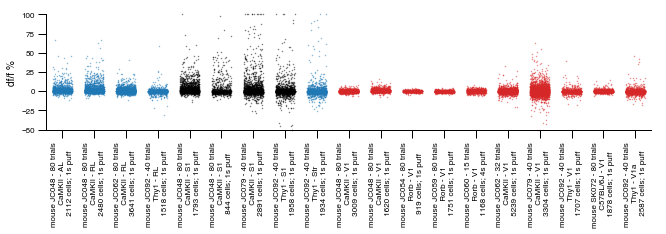

In [7]:
%matplotlib inline
expkeys = df[['mouse_id','session_name','session_subname','recording_area']].drop_duplicates()
expkeys.sort_values(['recording_area','mouse_id','session_name'],inplace =True)

fig = plt.figure(figsize = [12,4])
fig.add_axes([0.2,0.5,0.7,0.4])
mpar = dict(clip_on = False,
            markersize=3,
            alpha = 0.5,
            lw = 0,
            markeredgecolor = 'none')
# create data and labels
subs = []
vals = []
labels = []
cols = []
for ei,e in expkeys.iterrows():
    sel = np.where((df.mouse_id == e.mouse_id) & (df.session_name == e.session_name)  & (df.session_subname == e.session_subname))
    subs.append(df.iloc[sel])
    vals.append(np.array(subs[-1].puff_response_amplitude))
    strain = (Mouse() & 'mouse_id = "{0}"'.format((subs[-1].mouse_id.iloc[0]))).fetch('strain_name')[0]
    labels.append('mouse {0} - {3} trials\n {2} - {5}\n {1} cells; {4:1.0f}s puff'.format(subs[-1].mouse_id.iloc[0],
                                                                         len(vals[-1]),
                                                                         strain.split('-')[0],
                                                                         subs[-1].n_trials.iloc[0],
                                                                         np.round(subs[-1].puff_duration.iloc[0]),
                                                                         subs[-1].recording_area.iloc[0]))
    area = subs[-1].recording_area.iloc[0]
    if area == 'S1':
        cols.append(colors[0])
    elif area in ['V1','V1a']:
        cols.append(colors[1])
    else:
        cols.append(colors[2])
ms = plotScatterMultipleVariables(vals,
                                  color = cols,
                                  cliplimit=[-50,100],
                                  labels = labels,
                                  markerpar = mpar)
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('df/f %')
fig.savefig(pjoin(pngsavepath,'mean_puff_stim_all_sighted_one_session.png'))
fig.savefig(pjoin(pdfsavepath,'mean_puff_stim_all_sighted_one_session.pdf'))

### Baseline amplitudes

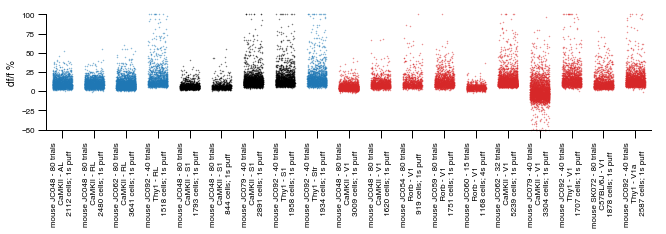

In [8]:
expkeys = df[['mouse_id','session_name','session_subname','recording_area']].drop_duplicates()
expkeys.sort_values(['recording_area','mouse_id','session_name'],inplace =True)

fig = plt.figure(figsize = [12,4])
fig.add_axes([0.2,0.5,0.7,0.4])
mpar = dict(clip_on = False,
            markersize=3,
            alpha = 0.5,
            lw = 0,
            markeredgecolor = 'none')
# create data and labels
subs = []
vals = []
labels = []
cols = []
for ei,e in expkeys.iterrows():
    sel = np.where((df.mouse_id == e.mouse_id) & (df.session_name == e.session_name)  & (df.session_subname == e.session_subname))
    subs.append(df.iloc[sel])
    vals.append(np.nanmean(np.stack(subs[-1].puff_amplitudes_pre),axis = 1))
    strain = (Mouse() & 'mouse_id = "{0}"'.format((subs[-1].mouse_id.iloc[0]))).fetch('strain_name')[0]
    labels.append('mouse {0} - {3} trials\n {2} - {5}\n {1} cells; {4:1.0f}s puff'.format(subs[-1].mouse_id.iloc[0],
                                                                         len(vals[-1]),
                                                                         strain.split('-')[0],
                                                                         subs[-1].n_trials.iloc[0],
                                                                         np.round(subs[-1].puff_duration.iloc[0]),
                                                                         subs[-1].recording_area.iloc[0]))
    area = subs[-1].recording_area.iloc[0]
    if area == 'S1':
        cols.append(colors[0])
    elif area in ['V1','V1a']:
        cols.append(colors[1])
    else:
        cols.append(colors[2])
ms = plotScatterMultipleVariables(vals,
                                  color = cols,
                                  cliplimit=[-50,100],
                                  labels = labels,
                                  markerpar = mpar)
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('df/f %')
fig.savefig(pjoin(pngsavepath,'mean_puff_pre_all_sighted_one_session.png'))
fig.savefig(pjoin(pdfsavepath,'mean_puff_pre_all_sighted_one_session.pdf'))

### Fraction of puff responsive trials

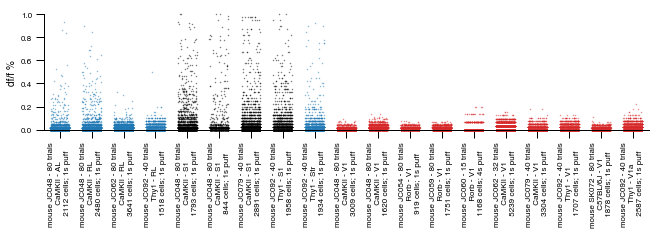

In [9]:
fig = plt.figure(figsize = [12,4])
fig.add_axes([0.2,0.5,0.7,0.4])
mpar = dict(clip_on = False,
            markersize=3,
            alpha = 0.5,
            lw = 0,
            markeredgecolor = 'none')
# create data and labels
expkeys = df[['mouse_id','session_name','session_subname','recording_area']].drop_duplicates()
expkeys.sort_values(['recording_area','mouse_id','session_name'],inplace =True)
subs = []
vals = []
labels = []
cols = []
for ei,e in expkeys.iterrows():
    sel = np.where((df.mouse_id == e.mouse_id) & (df.session_name == e.session_name)  & (df.session_subname == e.session_subname))
    subs.append(df.iloc[sel])
    vals.append(np.array(subs[-1].puff_fraction_responsive_trials))
    strain = (Mouse() & 'mouse_id = "{0}"'.format((subs[-1].mouse_id.iloc[0]))).fetch('strain_name')[0]
    labels.append('mouse {0} - {3} trials\n {2} - {5}\n {1} cells; {4:1.0f}s puff'.format(subs[-1].mouse_id.iloc[0],
                                                                         len(vals[-1]),
                                                                         strain.split('-')[0],
                                                                         subs[-1].n_trials.iloc[0],
                                                                         np.round(subs[-1].puff_duration.iloc[0]),
                                                                         subs[-1].recording_area.iloc[0]))
    area = subs[-1].recording_area.iloc[0]
    if area == 'S1':
        cols.append(colors[0])
    elif area in ['V1','V1a']:
        cols.append(colors[1])
    else:
        cols.append(colors[2])
ms = plotScatterMultipleVariables(vals,
                                  color = cols,
                                  cliplimit=[0,1],
                                  labels = labels,
                                  markerpar = mpar)
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('df/f %')
fig.savefig(pjoin(pngsavepath,'fraction_puff_responsive_all_sighted_one_session.png'))
fig.savefig(pjoin(pdfsavepath,'fraction_puff_responsive_all_sighted_one_session.pdf'))

### KS tests for significance between shifted and puff df/f

In [10]:
from scipy.stats import ks_2samp
print('KS-tests for S1:')
s1expkeys = df[['mouse_id','session_name','session_subname','recording_area']].drop_duplicates()
s1expkeys.sort_values(['recording_area','mouse_id','session_name'],inplace =True)
s1expkeys = s1expkeys[s1expkeys.recording_area == 'S1']
S1sig = 0
for ei,e in s1expkeys.iterrows():
    sel = np.where((df.mouse_id == e.mouse_id) & (df.session_name == e.session_name)  & (df.session_subname == e.session_subname))
    sub = df.iloc[sel]
    t = ks_2samp(np.nanmean(np.stack(sub.puff_amplitudes_pre),axis = 1),np.nanmean(np.stack(sub.puff_amplitudes),axis = 1))
    n = '{0} {1}'.format(sub.session_name.iloc[0],sub.session_subname.iloc[0])
    if t.pvalue<0.01:
        S1sig += 1
        print('\t {0} \t** p val: {1}'.format(n,t.pvalue))
    else:
        print('\t {0} \t not sig p val: {1}'.format(n,t.pvalue))
        
print('\nKS-tests for V1:')
V1sig = 0
v1expkeys = df[['mouse_id','session_name','session_subname','recording_area']].drop_duplicates()
v1expkeys.sort_values(['recording_area','mouse_id','session_name'],inplace =True)
v1expkeys = v1expkeys[v1expkeys.recording_area == 'V1']
V1sig = 0
for ei,e in v1expkeys.iterrows():
    sel = np.where((df.mouse_id == e.mouse_id) & (df.session_name == e.session_name)  & (df.session_subname == e.session_subname))
    sub = df.iloc[sel]
    t = ks_2samp(np.nanmean(np.stack(sub.puff_amplitudes_pre),axis = 1),np.nanmean(np.stack(sub.puff_amplitudes),axis = 1))
    n = '{0} {1}'.format(sub.session_name.iloc[0],sub.session_subname.iloc[0])
    if t.pvalue<0.01:
        V1sig += 1
        print('\t {0} \t** p val: {1}'.format(n,t.pvalue))
    else:
        print('\t {0} \t not sig p val: {1}'.format(n,t.pvalue))# for n,a,s in zip(ddV1['session_name'],ddV1['amps'],ddV1['amps_shifted']):
print('\n\n S1: the distributions of {0} of {1} experiments are significantly different.'
      .format(S1sig,len(s1expkeys)))
print('\n V1: the distributions of {0} of {1} experiments are significantly different.'
      .format(V1sig,len(v1expkeys)))

KS-tests for S1:
	 171102_JC048_2P_JC run03_bandpass_noise_sf_tuning_whiskers 	** p val: 3.2302197446167437e-79
	 171107_JC048_2P_S1_JC run00_bandpass_noise_sf_tuning_whiskers 	** p val: 1.1181275169475075e-07
	 181008_JC079_2P_JC run01_bandpass_noise_sf_tuning_whiskers 	** p val: 1.1932596537708142e-09
	 190126_JC092_2P_S1_JC run01_bandpass_noise_sf_tuning_whiskers 	 not sig p val: 0.08726822386813515

KS-tests for V1:
	 171102_JC048_2P_JC run02_bandpass_noise_sf_tuning_whiskers 	 not sig p val: 0.3681862395300974
	 171107_JC048_2P_V1_JC run01_bandpass_noise_sf_tuning_whiskers 	** p val: 1.956285602425329e-07
	 180425_JC054_2P_JC run00_bandpass_noise_sf_tuning_whiskers 	 not sig p val: 0.9684283809488177
	 180425_JC059_2P_JC run00_bandpass_noise_sf_tuning_whiskers 	 not sig p val: 0.1189663306237027
	 180208_JC060_2P_JC run02_bandpass_noise_circle_retino_whiskers 	** p val: 9.57558254291292e-06
	 180515_JC062_2P_JC run02_bandpass_noise_sf_tuning_whiskers 	 not sig p val: 0.88032181581

### Cumulatives df/f for the puff stimuli

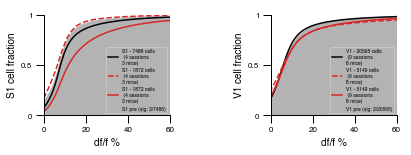

In [18]:
# With both the percentile and all data
edges = np.arange(-20,200,1)

ddV1 = df[(df['recording_area'] == 'V1')]
ddS1 = df[(df['recording_area'] == 'S1')]

iiS1 =  np.hstack(ddS1['puff_response_amplitude'])>np.percentile(np.hstack(ddS1['puff_response_amplitude']),75)
iiV1 =  np.hstack(ddV1['puff_response_amplitude'])>np.percentile(np.hstack(ddV1['puff_response_amplitude']),75)

binsS1,ed = np.histogram(np.hstack(ddS1['puff_amplitudes']),edges)
binsS1is,ed = np.histogram(np.hstack(ddS1['puff_amplitudes'].iloc[iiS1]),edges)

binsS1shift,ed = np.histogram(np.hstack(ddS1['puff_amplitudes_pre']),edges)
binsS1shiftis,ed = np.histogram(np.hstack(ddS1['puff_amplitudes_pre'].iloc[iiS1]),edges)

binsV1,ed = np.histogram(np.hstack(ddV1['puff_amplitudes']),edges)
binsV1is,ed = np.histogram(np.hstack(ddV1['puff_amplitudes'].iloc[iiV1]),edges)

binsV1shift,ed = np.histogram(np.hstack(ddV1['puff_amplitudes_pre']),edges)
binsV1shiftis,ed = np.histogram(np.hstack(ddV1['puff_amplitudes_pre'].iloc[iiV1]),edges)
# the figure
fig = plt.figure(figsize = [7,2])
fig.add_axes([0.15,0.2,0.25,0.7])

plt.fill_between(edges[:-1]+np.diff(edges[:2])/2,np.cumsum(binsS1shift)/np.sum(binsS1shift),
         '--',color = [.7,.7,.7],label = 'S1 pre (sig: {0}/{1})'.format(S1sig,len(ddS1)))

plt.plot(edges[:-1]+np.diff(edges[:2])/2,np.cumsum(binsS1)/np.sum(binsS1),
         color = colors[0],
        label = 'S1 - {0} cells \n ({1} sessions \n{2} mice)'.format(
            len(ddS1),
            len(ddS1['session_name'].unique()),
            len(ddS1['mouse_id'].unique())))
plt.plot(edges[:-1]+np.diff(edges[:2])/2,np.cumsum(binsS1shiftis)/np.sum(binsS1is),'--',
         color = colors[1],
        label = 'S1 - {0} cells \n ({1} sessions \n{2} mice)'.format(
            np.sum(iiS1),
            len(ddS1['session_name'].unique()),
            len(ddS1['mouse_id'].unique())))

plt.plot(edges[:-1]+np.diff(edges[:2])/2,np.cumsum(binsS1is)/np.sum(binsS1is),
         color = colors[1],
        label = 'S1 - {0} cells \n ({1} sessions \n{2} mice)'.format(
            np.sum(iiS1),
            len(ddS1['session_name'].unique()),
            len(ddS1['mouse_id'].unique())))

plt.xlim([0,60])
plt.xlabel('df/f %')
plt.ylabel('S1 cell fraction')
plt.xticks([0,20,40,60])
plt.legend(fontsize = 5)
plt.yticks([0,0.5,1],[0,0.5,1])
plt.ylim([0,1])

fig.add_axes([0.6,0.2,0.25,0.7]) # V1
plt.fill_between(edges[:-1]+np.diff(edges[:2])/2,np.cumsum(binsV1shift)/np.sum(binsV1shift),
         '--',color = [.7,.7,.7],label = 'V1 pre (sig: {0}/{1})'.format(V1sig,len(ddV1)))

plt.plot(edges[:-1]+np.diff(edges[:2])/2,np.cumsum(binsV1)/np.sum(binsV1),
         color = colors[0],
        label = 'V1 - {0} cells \n ({1} sessions \n{2} mice)'.format(
            len(ddV1),
            len(ddV1['session_name'].unique()),
            len(ddV1['mouse_id'].unique())))
plt.plot(edges[:-1]+np.diff(edges[:2])/2,np.cumsum(binsV1shiftis)/np.sum(binsV1is),'--',
         color = colors[1],
         label = 'V1 - {0} cells \n ({1} sessions \n{2} mice)'.format(
            np.sum(iiV1),
            len(ddV1['session_name'].unique()),
            len(ddV1['mouse_id'].unique())))

plt.plot(edges[:-1]+np.diff(edges[:2])/2,np.cumsum(binsV1is)/np.sum(binsV1is),
         color = colors[1],
        label = 'V1 - {0} cells \n ({1} sessions \n{2} mice)'.format(
            np.sum(iiV1),
            len(ddV1['session_name'].unique()),
            len(ddV1['mouse_id'].unique())))

plt.xlim([0,60])
plt.xlabel('df/f %')
plt.ylabel('V1 cell fraction')
plt.xticks([0,20,40,60])
plt.legend(fontsize = 5)
plt.yticks([0,0.5,1],[0,0.5,1])
plt.ylim([0,1])

plt.legend(fontsize = 5)
fig.savefig(pjoin(pngsavepath,'mean_puff_stim_cumulative_compare.png'))
fig.savefig(pjoin(pdfsavepath,'mean_puff_stim_cumulative_compare.pdf'))

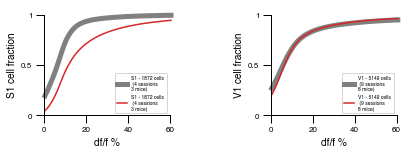

In [16]:
fig = plt.figure(figsize = [7,2])
idx = np.where((edges>=0) & (edges<=60))
fig.add_axes([0.15,0.2,0.25,0.7])
plt.plot(edges[idx]+np.diff(edges[:2])/2,np.cumsum(binsS1shiftis)[idx]/np.sum(binsS1is),'-',
         color = [.5,.5,.5],
         lw = 5,
         clip_on=False,
         label = 'S1 - {0} cells \n ({1} sessions \n{2} mice)'.format(
            np.sum(iiS1),
            len(ddS1['session_name'].unique()),
            len(ddS1['mouse_id'].unique())))

plt.plot(edges[idx]+np.diff(edges[:2])/2,np.cumsum(binsS1is)[idx]/np.sum(binsS1is),
         color = colors[1],
         clip_on=False,
        label = 'S1 - {0} cells \n ({1} sessions \n{2} mice)'.format(
            np.sum(iiS1),
            len(ddS1['session_name'].unique()),
            len(ddS1['mouse_id'].unique())))

plt.xlim([0,60])
plt.xlabel('df/f %')
plt.ylabel('S1 cell fraction')
plt.xticks([0,20,40,60])
plt.legend(fontsize = 5)
plt.yticks([0,0.5,1],[0,0.5,1])
plt.ylim([0,1])

fig.add_axes([0.6,0.2,0.25,0.7]) # V1

plt.plot(edges[idx]+np.diff(edges[:2])/2,np.cumsum(binsV1shiftis)[idx]/np.sum(binsV1is),'-',
         color = [.5,.5,.5],
         lw = 5,
         clip_on=False,
         label = 'V1 - {0} cells \n ({1} sessions \n{2} mice)'.format(
            np.sum(iiV1),
            len(ddV1['session_name'].unique()),
            len(ddV1['mouse_id'].unique())))
plt.plot(edges[idx]+np.diff(edges[:2])/2,np.cumsum(binsV1is)[idx]/np.sum(binsV1is),
         color = colors[1],
         clip_on=False,
        label = 'V1 - {0} cells \n ({1} sessions \n{2} mice)'.format(
            np.sum(iiV1),
            len(ddV1['session_name'].unique()),
            len(ddV1['mouse_id'].unique())))

plt.xlim([0,60])
plt.xlabel('df/f %')
plt.ylabel('V1 cell fraction')
plt.xticks([0,20,40,60])
plt.legend(fontsize = 5)
plt.yticks([0,0.5,1],[0,0.5,1])
plt.ylim([0,1])
fig.savefig(pjoin(pngsavepath,'mean_puff_stim_cumulative_compare_75perc.png'))
fig.savefig(pjoin(pdfsavepath,'mean_puff_stim_cumulative_compare_75perc.pdf'))

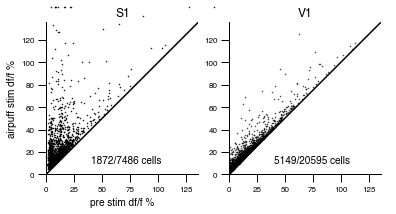

In [14]:
fig = plt.figure()
m = np.nanmax(np.hstack(ddV1['puff_amplitudes_pre'].iloc[iiV1].apply(np.nanmean)))*0.5
fig.add_subplot(1,2,2)
plt.plot(np.clip(np.hstack(ddV1['puff_amplitudes_pre'].iloc[iiV1].apply(np.nanmean)),-50,m*1.1),
         np.clip(np.hstack(ddV1['puff_amplitudes'].iloc[iiV1].apply(np.nanmean)),-50,m*1.1),'.k',markersize = 1,alpha = 0.8)
plt.plot([-10,m],[-10,m])
plt.axis('square')
plt.axis([0,m,0,m])
plt.text(40,10,'{0}/{1} cells'.format(np.sum(iiV1),len(iiV1)))
plt.title('V1')
fig.add_subplot(1,2,1)


plt.plot(np.clip(np.hstack(ddS1['puff_amplitudes_pre'].iloc[iiS1].apply(np.nanmean)),-50,m*1.1),
         np.clip(np.hstack(ddS1['puff_amplitudes'].iloc[iiS1].apply(np.nanmean)),-50,m*1.1),'.k',
         markersize = 1,alpha = 1,clip_on = False)

plt.plot([-50,m],[-50,m])
plt.axis('square')
plt.axis([0,m,0,m])
plt.ylabel('airpuff stim df/f %')
plt.xlabel('pre stim df/f %')
plt.text(40,10,'{0}/{1} cells'.format(np.sum(iiS1),len(iiS1)))
plt.title('S1')
fig.savefig(pjoin(pngsavepath,'mean_puff_stim_scatters_compare_75perc.png'))
fig.savefig(pjoin(pdfsavepath,'mean_puff_stim_scatters_compare_75perc.pdf'))


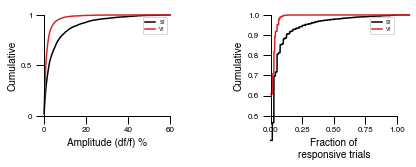

In [20]:
%matplotlib inline
fig = plt.figure(figsize = [7,2])
fig.add_axes([0.15,0.2,0.25,0.7]) # response amplitudes

edges = np.linspace(0,60.1,1000)
plotCumulative(np.hstack(ddS1.puff_response_amplitude),edges,
               clip_on = False,color=colors[0],label='S1')
plotCumulative(np.hstack(ddV1.puff_response_amplitude),edges,
               clip_on = False,color=colors[1],label='V1')
plt.ylim([0,1])
plt.xlim([0,60])
plt.xlabel('Amplitude (df/f) %')
plt.ylabel('Cumulative')
plt.xticks([0,20,40,60])
plt.legend(fontsize = 5)
plt.yticks([0,0.5,1],[0,0.5,1])
plt.ylim([0,1])

fig.add_axes([0.6,0.2,0.25,0.7]) # fraction of responsive trials
edges = np.linspace(-0.001,1.1,1000)
plotCumulative(np.hstack(ddS1.puff_fraction_responsive_trials),edges,
               clip_on = False,color=colors[0],label='S1')
plotCumulative(np.hstack(ddV1.puff_fraction_responsive_trials),edges,
               clip_on = False,color=colors[1],label='V1')
plt.ylim([0.5,1])
plt.xlim([0,0.5])
plt.xlabel('Fraction of\nresponsive trials')
plt.ylabel('Cumulative')
plt.xticks([0,0.25,0.5,0.75,1])
plt.legend(fontsize = 5)
fig.savefig(pjoin(pngsavepath,'mean_puff_amplitudes.png'))
fig.savefig(pjoin(pdfsavepath,'mean_puff_amplitudes.pdf'))


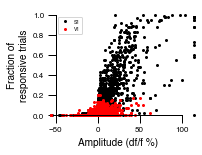

In [21]:
fig = plt.figure(figsize = [7,2])
fig.add_axes([0.15,0.2,0.25,0.7]) # response amplitudes
plt.plot(np.clip(np.hstack(ddS1.puff_response_amplitude) ,-55,115),np.hstack(ddS1.puff_fraction_responsive_trials),'ko',
         markersize = 2,alpha=1,clip_on = False,label='S1')
plt.plot(np.clip(np.hstack(ddV1.puff_response_amplitude) ,-55,115),np.hstack(ddV1.puff_fraction_responsive_trials),'ro',
         markersize = 2,alpha=1,clip_on=False,label='V1')
plt.ylim([0,1])
plt.xlim([-50,100])
plt.ylabel('Fraction of\nresponsive trials')
plt.xlabel('Amplitude (df/f %)');
plt.legend(fontsize = 5)
fig.savefig(pjoin(pngsavepath,'amplitude_fraction_responsive_trials.png'))
fig.savefig(pjoin(pdfsavepath,'amplitude_fraction_responsive_trials.pdf'))

### Violin plots

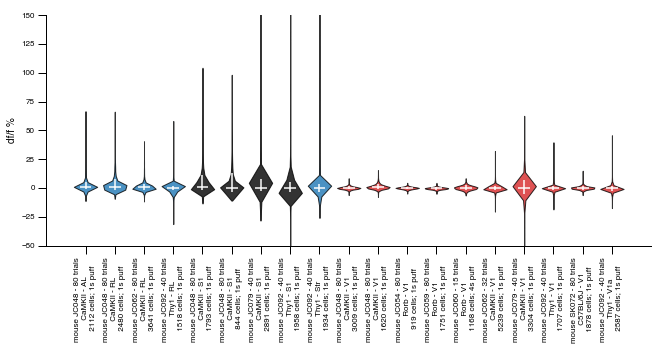

In [22]:
# create data and labels
expkeys = df[['mouse_id','session_name','session_subname','recording_area']].drop_duplicates()
expkeys.sort_values(['recording_area','mouse_id','session_name'],inplace =True)
subs = []
vals = []
labels = []
cols = []
for ei,e in expkeys.iterrows():
    sel = np.where((df.mouse_id == e.mouse_id) & (df.session_name == e.session_name)  & (df.session_subname == e.session_subname))
    subs.append(df.iloc[sel])
    vals.append(np.array(subs[-1].puff_response_amplitude))
    strain = (Mouse() & 'mouse_id = "{0}"'.format((subs[-1].mouse_id.iloc[0]))).fetch('strain_name')[0]
    labels.append('mouse {0} - {3} trials\n {2} - {5}\n {1} cells; {4:1.0f}s puff'.format(subs[-1].mouse_id.iloc[0],
                                                                         len(vals[-1]),
                                                                         strain.split('-')[0],
                                                                         subs[-1].n_trials.iloc[0],
                                                                         np.round(subs[-1].puff_duration.iloc[0]),
                                                                         subs[-1].recording_area.iloc[0]))
    area = subs[-1].recording_area.iloc[0]
    if area == 'S1':
        cols.append(colors[0])
    elif area in ['V1','V1a']:
        cols.append(colors[1])
    else:
        cols.append(colors[2])

fig = plt.figure(figsize = [12,8])
fig.add_axes([0.2,0.5,0.7,0.4])

violinparts = plt.violinplot(vals,np.arange(len(vals)), points=20, vert=True, widths=.8,
                      showmeans=False, showextrema=False, showmedians=False,
                      bw_method=0.3)
for l,pc in zip(cols,violinparts['bodies']):
    pc.set_facecolor(l)
    pc.set_edgecolor('black')
    pc.set_alpha(0.8)
plt.ylim([-20,150])

pcntiles = [np.percentile(r, [10, 50, 90]) for r in vals]
[plt.vlines(i,r[0],r[2],color = 'w') for i,r in enumerate(pcntiles)]
[plt.hlines(r[1],i-0.2,i+0.2,color = 'w') for i,r in enumerate(pcntiles)];
plt.xticks(np.arange(len(vals)),labels)
plt.xticks(rotation=90,fontsize=8);
plt.ylim([-50,150])
plt.ylabel('df/f %')
fig.savefig(pjoin(pngsavepath,'mean_puff_stim_violin_one_session.png'))
fig.savefig(pjoin(pdfsavepath,'mean_puff_stim_violin_one_session.pdf'));

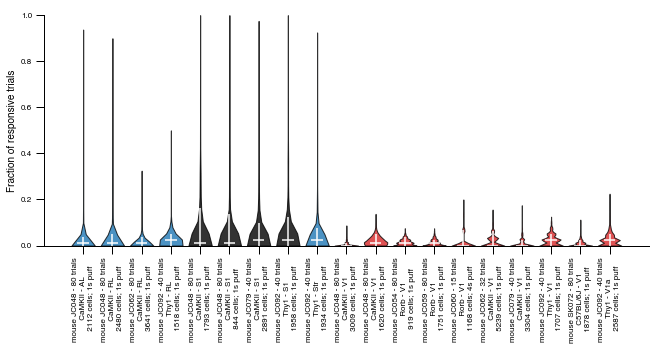

In [23]:
# create data and labels
expkeys = df[['mouse_id','session_name','session_subname','recording_area']].drop_duplicates()
expkeys.sort_values(['recording_area','mouse_id','session_name'],inplace =True)
subs = []
vals = []
labels = []
cols = []
for ei,e in expkeys.iterrows():
    sel = np.where((df.mouse_id == e.mouse_id) & (df.session_name == e.session_name)  & (df.session_subname == e.session_subname))
    subs.append(df.iloc[sel])
    vals.append(np.array(subs[-1].puff_fraction_responsive_trials))
    strain = (Mouse() & 'mouse_id = "{0}"'.format((subs[-1].mouse_id.iloc[0]))).fetch('strain_name')[0]
    labels.append('mouse {0} - {3} trials\n {2} - {5}\n {1} cells; {4:1.0f}s puff'.format(subs[-1].mouse_id.iloc[0],
                                                                         len(vals[-1]),
                                                                         strain.split('-')[0],
                                                                         subs[-1].n_trials.iloc[0],
                                                                         np.round(subs[-1].puff_duration.iloc[0]),
                                                                         subs[-1].recording_area.iloc[0]))
    area = subs[-1].recording_area.iloc[0]
    if area == 'S1':
        cols.append(colors[0])
    elif area in ['V1','V1a']:
        cols.append(colors[1])
    else:
        cols.append(colors[2])

fig = plt.figure(figsize = [12,8])
fig.add_axes([0.2,0.5,0.7,0.4])

violinparts = plt.violinplot(vals,np.arange(len(vals)), points=20, vert=True, widths=.8,
                      showmeans=False, showextrema=False, showmedians=False,
                      bw_method=0.3)
for l,pc in zip(cols,violinparts['bodies']):
    pc.set_facecolor(l)
    pc.set_edgecolor('black')
    pc.set_alpha(0.8)
plt.ylim([0,1])

pcntiles = [np.percentile(r, [10, 50, 90]) for r in vals]
[plt.vlines(i,r[0],r[2],color = 'w') for i,r in enumerate(pcntiles)]
[plt.hlines(r[1],i-0.2,i+0.2,color = 'w') for i,r in enumerate(pcntiles)];
plt.xticks(np.arange(len(vals)),labels)
plt.xticks(rotation=90,fontsize=8);
plt.ylim([0,1])
plt.ylabel('Fraction of responsive trials')

fig.savefig(pjoin(pngsavepath,'fraction_responsive_violin_one_session_shifted.png'))
fig.savefig(pjoin(pdfsavepath,'fraction_responsive_violin_one_session_shifted.pdf'))

## Fraction of cells per experiment responding > 15% of the trials

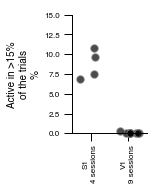

In [39]:
frac = 0.15
fracV1 = []
nfracV1 = []
ampV1 = []
# stdV1 = []
for ie,e in v1expkeys.iterrows():
    tmp = np.array(ddV1[(ddV1.session_name == e.session_name) & (ddV1.session_subname == e.session_subname)].puff_fraction_responsive_trials)
    amptmp = np.array(ddV1[(ddV1.session_name == e.session_name) & (ddV1.session_subname == e.session_subname)].puff_response_amplitude)
    fracV1.append(np.sum(tmp>=frac)/len(tmp))
    nfracV1.append(np.sum(tmp>=frac))
    ampV1.append(amptmp[tmp>=frac])
#     stdV1.append(np.nanstd(amptmp[tmp>=frac]))
fracS1 = []
nfracS1 = []
# ampS1 = []
# stdS1 = []
for ie,e in s1expkeys.iterrows():
    tmp = np.array(ddS1[(ddS1.session_name == e.session_name) & (ddS1.session_subname == e.session_subname)].puff_fraction_responsive_trials)
    amptmp = np.array(ddS1[(ddS1.session_name == e.session_name) & (ddS1.session_subname == e.session_subname)].puff_response_amplitude)
    fracS1.append(np.sum(tmp>frac)/len(tmp))
    nfracS1.append(np.sum(tmp>frac))
#     ampS1.append(np.nanmean(amptmp[tmp>=frac]))
#     stdS1.append(np.nanstd(amptmp[tmp>=frac]))

fig = plt.figure(figsize = [7,3])
fig.add_axes([0.15,0.4,0.15,0.55])
mpar = dict(clip_on = False,
            markersize=15,
            alpha = .7,
            lw = 1,
            markeredgecolor = [.5,.5,.5])
vals = [np.array(v)*100 for v in [fracS1,fracV1]]
labels = ['S1\n{0} sessions'.format(len(s1expkeys)),
          'V1\n{0} sessions'.format(len(v1expkeys))]
cols = [colors[0]]*2
ms = plotScatterMultipleVariables(vals,
                                  color = cols,
                                  cliplimit=[0,15],
                                  labels = labels,
                                  markerpar = mpar)
plt.xticks(np.arange(len(vals)),labels)
plt.xticks(rotation=90);
plt.ylabel('Active in >15%\nof the trials\n%');
fig.savefig(pjoin(pngsavepath,'cells_responding_15perc_trials.png'))
fig.savefig(pjoin(pdfsavepath,'cells_responding_15perc_trials.pdf'))


In [49]:
np.sum(ddS1.puff_fraction_responsive_trials>0.15),len(ddS1.puff_fraction_responsive_trials),np.sum(ddV1.puff_fraction_responsive_trials>0.15),len(ddV1.puff_fraction_responsive_trials)

(621, 7486, 9, 20595)

## Inspect dataset

In [127]:
key = keys[6] 
dat = pd.DataFrame((StimulusAirPuff()*StimulusAirPuff.Triggered()*
                    TwoPhotonVolume()*Segmentation.Traces()*
                    VisualStimuliStats.VisualStats() & 
             key).fetch())

In [134]:
%matplotlib widget
plt.figure(figsize=[3,5])
idx = np.argsort(dat.puff_fraction_responsive_trials)
plt.imshow(np.nanmean(np.stack(dat.puff_df_f),axis = 1)[idx],aspect = 'auto',clim = [0,50])

plt.figure(figsize = [3,5])
idx = np.argsort(dat.puff_response_amplitude)
idx = np.argsort(dat.puff_fraction_responsive_trials)

nbPlayStack(np.stack(dat.puff_df_f)[idx],cmap='RdBu_r',clim = [-150,150])
plt.vlines(np.cumsum([dat.puff_wpre.iloc[0],dat.puff_wdur.iloc[0]]),0,40)

FigureCanvasNbAgg()

FigureCanvasNbAgg()

# The following inspects raw traces triggered to the airpuff stimulus from a single experiment

In [130]:
x = np.stack(dat.puff_df_f)
fig = plt.figure(figsize = [3,5])
idx = np.argsort(dat.puff_response_amplitude)
t = np.arange(x.shape[2])*dat.puff_dt.iloc[0]
from djexpcode.calciumutils import responsive_trials_index
def plot_responses(ii):
    i = idx[ii]
    fig.clf()
    didx = responsive_trials_index(dat.puff_df_f.iloc[i],dat.puff_wpre.iloc[0],dat.puff_wdur.iloc[0])
    offset = np.nanstd(dat.puff_df_f.iloc[i])
    for it,X in enumerate(dat.puff_df_f.iloc[i]):
        c = 'k'
        if it in didx:
            c = 'y'
        plt.plot(t,X-np.mean(X[:8])+offset*it,c)
    plt.plot(t,dat.puff_df_f.iloc[i].mean(axis = 0),'r',lw = 2)
    plt.vlines(np.array([dat.puff_wpre.iloc[i],
                         dat.puff_wpre.iloc[i]+dat.puff_wdur.iloc[i]])*dat.puff_dt.iloc[0]
               ,0,offset*40,color='r')
    plt.title(dat.puff_fraction_responsive_trials.iloc[i])
plot_responses(3)
interact(plot_responses,ii = widgets.IntSlider(min=0,max=len(dat)-1,step=1,value=1))

FigureCanvasNbAgg()

/home/joao/lib/djexpcode-tacnav/djexpcode/calciumutils.py:234: RuntimeWarning: invalid value encountered in greater
  res.append(np.where(np.sum(x[:,wpre:wpre+wdur] > thresh,axis = 1) > n_samples_threshold)[0])


interactive(children=(IntSlider(value=1, description='ii', max=2890), Output()), _dom_classes=('widget-interac…

<function __main__.plot_responses(ii)>

In [ ]:
from djexpcode.schemas import *
StimulusAirPuff().populate(display_progress = True)